## The Data

https://towardsdatascience.com/automated-machine-learning-using-pycaret-4bb90ab3e2c7

In [1]:
import pandas as pd

df = pd.read_csv('data/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [27]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Prepare the data

In [28]:
from pycaret.classification import *

setup = setup(data=df, target='Category', session_id=123)

,Description,Value
0,session_id,123
1,Target,Category
2,Target Type,Multiclass
3,Label Encoded,"0=Blood Donor: 0, 0s=suspect Blood Donor: 1, 1=Hepatitis: 2, 2=Fibrosis: 3, 3=Cirrhosis: 4"
4,Original Data,"(615, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
from pycaret.classification import *

setup = setup(data=df, target='Category', numeric_imputation='median', session_id=123)

,Description,Value
0,session_id,123
1,Target,Category
2,Target Type,Multiclass
3,Label Encoded,"0=Blood Donor: 0, 0s=suspect Blood Donor: 1, 1=Hepatitis: 2, 2=Fibrosis: 3, 3=Cirrhosis: 4"
4,Original Data,"(615, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare the model

In [33]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9349,0.3953,0.6589,0.9123,0.9205,0.6990,0.7125,0.1990
lightgbm,Light Gradient Boosting Machine,0.9326,0.3949,0.6161,0.9046,0.9159,0.6988,0.7104,0.2430
rf,Random Forest Classifier,0.9256,0.3949,0.6195,0.8982,0.9085,0.6666,0.6802,0.0820
lda,Linear Discriminant Analysis,0.9233,0.3861,0.6228,0.9158,0.9141,0.6571,0.6698,0.0060
svm,SVM - Linear Kernel,0.9186,0.0000,0.5679,0.8954,0.9023,0.6358,0.6574,0.0130
et,Extra Trees Classifier,0.9186,0.3936,0.5473,0.8756,0.8946,0.5979,0.6266,0.0710
lr,Logistic Regression,0.9140,0.3769,0.5974,0.9069,0.9080,0.6406,0.6459,1.2520
dt,Decision Tree Classifier,0.9093,0.3640,0.5191,0.9070,0.9039,0.6191,0.6265,0.0070
qda,Quadratic Discriminant Analysis,0.9093,0.3621,0.5180,0.8746,0.8885,0.5835,0.6013,0.0140
knn,K Neighbors Classifier,0.9070,0.3695,0.4595,0.8699,0.8833,0.5160,0.5519,0.0130


## Reproduce the best model

In [11]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [34]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8837,0.9826,0.4000,0.8456,0.8606,0.5069,0.5149
1,0.9767,1.0000,0.9000,0.9884,0.9767,0.9087,0.9106
2,0.9767,0.9994,0.8000,0.9541,0.9653,0.9009,0.9063
3,0.8605,0.9705,0.4892,0.8605,0.8605,0.4522,0.4532
4,0.9302,0.0000,0.6250,0.9153,0.9149,0.6436,0.6566
5,0.9302,0.0000,0.5000,0.8705,0.8983,0.6006,0.6293
6,0.9302,0.0000,0.6250,0.9076,0.9188,0.6417,0.6469
7,0.9302,0.0000,0.6250,0.8890,0.9045,0.6446,0.6925
8,0.9535,0.0000,0.7500,0.9094,0.9308,0.7828,0.8053
9,0.9767,0.0000,0.8750,0.9826,0.9745,0.9075,0.9095


In [15]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Hyperparameter tuning

In [35]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8605,0.9794,0.3946,0.8419,0.8450,0.4545,0.4654
1,0.9302,0.9972,0.7000,0.9153,0.9149,0.7048,0.7157
2,0.9535,0.9978,0.7000,0.9496,0.9442,0.8170,0.8205
3,0.8605,0.9656,0.4892,0.8488,0.8527,0.4534,0.4563
4,0.9302,0.0000,0.6250,0.8959,0.9110,0.6427,0.6517
5,0.9302,0.0000,0.5000,0.8705,0.8983,0.6006,0.6293
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9302,0.0000,0.6250,0.9094,0.9153,0.6759,0.6929
8,0.9767,0.0000,0.8750,0.9774,0.9730,0.9002,0.9055
9,0.9535,0.0000,0.7917,0.9541,0.9498,0.8005,0.8052


In [14]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Evaluate the model

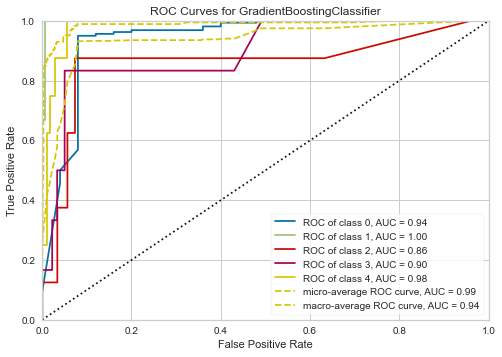

In [17]:
plot_model(tuned_gbc, plot='auc')

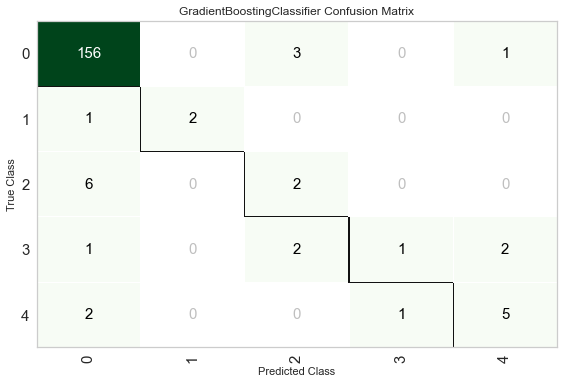

In [20]:
plot_model(tuned_gbc, plot='confusion_matrix')

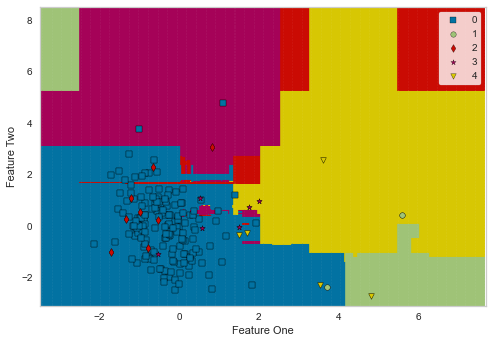

In [21]:
plot_model(tuned_gbc, plot='boundary')

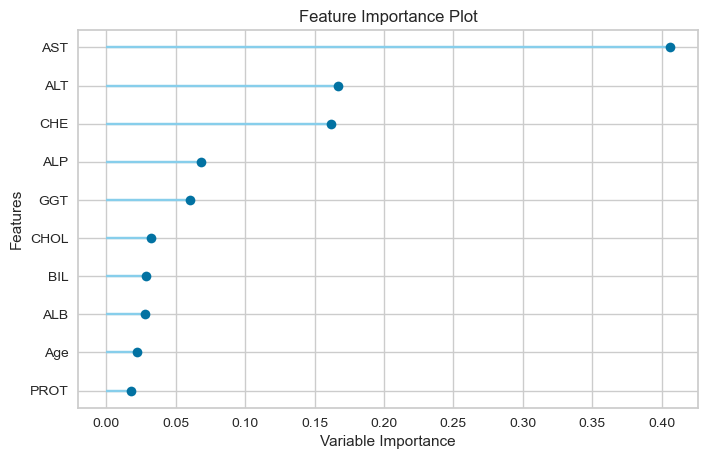

In [19]:
plot_model(tuned_gbc, plot='feature')

## Test the model

In [36]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8973,0.9391,0.5129,0.8758,0.8831,0.5237,0.5325


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Category,Label,Score
0,39.0,47.000000,66.500000,24.799999,29.100000,10.500000,10.04,6.26,73.0,49.799999,78.400002,0.0,0=Blood Donor,0=Blood Donor,0.9970
1,33.0,46.400002,68.199997,10.300000,20.000000,5.700000,7.36,4.30,79.0,18.700001,68.599998,0.0,0=Blood Donor,0=Blood Donor,0.9962
2,49.0,43.299999,71.500000,28.400000,26.000000,6.200000,7.68,5.91,77.0,19.100000,76.900002,1.0,0=Blood Donor,0=Blood Donor,0.9973
3,61.0,43.400002,47.500000,12.800000,17.299999,5.600000,7.52,5.81,71.0,11.800000,69.900002,1.0,0=Blood Donor,0=Blood Donor,0.9974
4,33.0,40.599998,73.699997,12.600000,16.299999,3.100000,7.75,6.36,67.0,19.500000,71.400002,1.0,0=Blood Donor,0=Blood Donor,0.9973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,34.0,42.599998,27.000000,21.400000,21.700001,7.200000,8.15,6.79,85.0,13.900000,67.699997,0.0,0=Blood Donor,0=Blood Donor,0.5084
181,64.0,43.000000,52.700001,31.600000,29.200001,5.500000,11.69,6.00,63.0,61.900002,73.400002,1.0,0=Blood Donor,0=Blood Donor,0.9970
182,55.0,44.099998,60.000000,26.299999,25.900000,5.100000,7.23,7.30,88.0,41.599998,77.699997,0.0,0=Blood Donor,0=Blood Donor,0.9970
183,48.0,32.000000,66.300003,14.200000,21.299999,5.500000,4.72,5.23,41.0,17.200001,65.599998,1.0,0=Blood Donor,0=Blood Donor,0.9973


## Save the model

In [37]:
final_gbc = finalize_model(tuned_gbc)

In [40]:
save_model(final_gbc, 'Final Model GBC')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Category',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_i

In [41]:
model = load_model('Final Model GBC')

Transformation Pipeline and Model Successfully Loaded
